<font size=15>
<font face="Times New Roman">
    <center>Final Project of Aircraft Propulsion System</center>
</font>
    
<font size=6>
    <font face="Times New Roman">
    <center>Language：Python</center>
    <center>Environment：Jupyter lab</center>
    <center>Output：LaTeX</center>
</font>
    
    

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


导入标准大气表

In [2]:
table_ = pd.read_csv("table.csv", header=0,usecols=[0,1,2,3,4])
table_

,H,T,P,rho,a
0,0,288.15,101325.2,1.22505,340.29
1,1000,281.65,89875.8,1.11168,336.43
2,2000,275.15,79495.6,1.00646,332.53
3,3000,268.65,70108.7,0.90913,328.58
4,4000,262.15,61640.7,0.81013,324.58
5,5000,255.65,54019.9,0.73612,320.53
6,6000,249.15,47180.8,0.65969,316.43
7,7000,242.65,41060.4,0.58950,312.27
8,8000,236.15,35600.1,0.52517,308.06
9,9000,229.65,30742.9,0.46635,303.79


In [3]:
def parameters(H):
    table_ = pd.read_csv("table.csv", header=0,usecols=[0,1,2,3,4])
    H0=table_.iloc[:,0]
    err = pd.array([abs(H-i) for i in H0])
    index = err == min(err)
    return float(table_.loc[index,'T']), float(table_.loc[index,'P'])

根据给定的高度查国际标准大气数据表，得到静温和静压。

In [4]:
Ma_0 = 0.72
H = 10000#m
T_0, p_0 = parameters(H)
print('T_0=%f'%T_0)
print('p_0=%f'%p_0)

T_0=223.150000
p_0=26435.800000


输入其他参数：

In [5]:
pi_C = 25
sigma_i = 0.97
eta_c = 0.8422
eta_TH = 0.9064
eta_TL = 0.9282
sigma_b = 0.97
eta_b = 0.98
eta_mH = 0.98
eta_mL = 0.98
eta_B = 0.82
eta_g = 0.99
delta_1 = 0.05
delta_2=0.02
C_T0 = 0
beta_ = 0
C_p = 1004.6#J/(kg*K)
C_pg = 1234.8#J/(kg*K)
k = 1.4
k_g = 1.3
R = 287.15#J/kg*K
H_u = 42900000#J
sigma_e = 0.98

此高度的声速：
$$
a_{0}=\sqrt{k R T_{0}}
$$

In [6]:
a_0 = (k*R*T_0)**0.5
print(a_0)

299.51382522347774


发动机工作时进口速度：

In [7]:
c_0=Ma_0*a_0
print(c_0)

215.64995416090397


由静参数和给定的飞行马赫数计算总温和总压：
$$p_{t0}=p_{0}\left(1+\frac{k-1}{2} M a_{0}^{2}\right)^{k-1}$$
$$T_{\mathrm{t0}}=T_{0}\left(1+\frac{k-1}{2} M a_{0}^{2}\right) $$

In [8]:
p_t0 = p_0*(1+(k-1)/2*Ma_0**2)**(k/(k-1))
print(p_t0)
T_t0 = T_0*(1+(k-1)/2*Ma_0**2)
print(T_t0)

37337.35611195005
246.286192


进气道出口总温和总压：
$${c}{p_{t2}=\sigma_{i} \times p_{i 0}}$$
$${T_{i 2}=T_{i 0}}$$

In [9]:
p_t2 = sigma_i*p_t0
print(p_t2)
T_t2 = T_t0
print(T_t2)

36217.23542859155
246.286192


压气机出口总温和总压：
$${p_{\mathrm{t} 3}=p_{\mathrm{t} 2} \times \pi_{\mathrm{C}}} $$
$${T_{\mathrm{t} 3}=T_{\mathrm{t} 2}\left(1+\frac{\pi_c^{\frac{k-1}{k}}-1}{\eta_c}\right)}$$

In [10]:
p_t3 = p_t2*pi_C
print(p_t3)
T_t3 = T_t2*(1+(pi_C**((k-1)/k)-1)/eta_c)
print(T_t3)

905430.8857147887
687.4152780569347


燃烧室出口参数：
$$
{f=\frac{W_{\mathrm{f}}}{W_{3 \mathrm{a}}}=\frac{C_{\mathrm{pg}}\ T_{\mathrm{t4}}-C_{p} T_{\mathrm{t} 3}}{\eta_{\mathrm{b}} H_{\mathrm{u}}-C_{pg}\  T_{\mathrm{t4}}}}
$$

燃烧室出口总温查阅发动机数据取得：
$$T_{t4}=1600K$$

In [11]:
T_t4 = 1600

In [12]:
f_ = (C_pg*T_t4-C_p*T_t3)/(eta_b*H_u-C_pg*T_t4)
print(f_)

0.03207438595967894


出口总压：
$$
{p_{\mathrm{t4}}=p_{\mathrm{t} 3} \sigma_{\mathrm{b}}}
$$

In [13]:
p_t4 = p_t3*sigma_b
print(p_t4)

878267.959143345


高压涡轮出口参数：
$$
\tau_{\mathrm{ml}}=\frac{T_{\mathrm{t4a}}}{T_{\mathrm{t4.5}}}=\frac{\left(1-\beta-\delta_{1}-\delta_{2}\right)(1+f)+C_{\rho} \delta_{1} T_{\mathrm{t} 3} /\left(C_{\rho \mathrm{g}} T_{\mathrm{t4}}\right)}{\left(1-\beta-\delta_{1}-\delta_{2}\right)(1+f)+\delta_{1}}
$$

In [14]:
tau_m1 = ((1-beta_-delta_1-delta_2)*(1+f_) + C_p*delta_1*T_t3/(C_pg*T_t4))/((1-beta_-delta_1-delta_2)*(1+f_)+delta_1)
print(tau_m1)

0.9677935177519384


$$
T_{t4a}=T_{t4}\tau_{ml}\\
p_{t4a}=p_{t4}
$$

In [15]:
T_t4a = T_t4*tau_m1
p_t4a = p_t4
print(T_t4a)
print(p_t4a)

1548.4696284031015
878267.959143345


$$
\frac{T_{\mathrm{t4a}}}{T_{\mathrm{t4.5}}}=1-\frac{C_{p}\left(T_{\mathrm{t} 3}-T_{\mathrm{t} 2}\right)}{\left[\left(1-\beta-\delta_{1}-\delta_{2}\right)(1+f)+\delta_{1}\right] \eta_{\mathrm{mH}} c_{p \mathrm{g}} T_{\mathrm{t4a}}}
$$

In [16]:
a = 1 - C_p*(T_t3-T_t2)/((1-beta_-delta_1-delta_2)*(1+f_)+delta_1)/eta_mH/C_pg/T_t4a
print(a)

0.7658007152139484


$$
T_{\mathrm{t4.5}}=\frac{T_{\mathrm{t4.5}}}{T_{\mathrm{t4a}}} T_{\mathrm{t4a}}
$$

In [17]:
T_t45 = a*T_t4a
print(T_t45)

1185.819148918172


$$
 \pi_{\mathrm{TH}}=\frac{p_{\text {t4a }}}{p_{\text {t4.5 }}} =\left[1-\left(1-\frac{T_{\text {4.5 }}}{T_{\text {t4a }}}\right) / \eta_{\text {Th}}\right]^{-\frac{k_{\mathrm{g}}}{k_{\mathrm{g}}-1}}
$$


In [18]:
pi_TH = (1-(1-T_t45/T_t4a)/eta_TH)**(-k_g/(k_g-1))
print(pi_TH)

3.652223518294377


$$
p_{t4.5}=\frac{p_{\text {t4a }}}{\pi_{\text {TH}}} 
$$

In [19]:
p_t45 = p_t4a/pi_TH
print(p_t45)

240474.86544676338


低压涡轮出口参数：
$$
\tau_{\mathrm{m} 2}=\frac{T_{\mathrm{t4c}}}{T_{\mathrm{t} 4.5}}=\frac{\left(1-\beta-\delta_{1}-\delta_{2}\right)(1+f)+\delta_{1}+\delta_{2} C_{\mathrm{p}} T_{\mathrm{t} 3} /\left(C_{pg} T_{\mathrm{4.5}}\right)}{\left(1-\beta-\delta_{1}-\delta_{2}\right)(1+f)+\delta_{1}+\delta_{2}}
$$

In [20]:
tau_m2 = ((1-beta_-delta_1-delta_2)*(1+f_)+delta_1+delta_2*C_p*T_t3/(C_pg*T_t45))/((1-beta_-delta_1-delta_2)*(1+f_)+delta_1+delta_2)
print(tau_m2)

0.9897385990664198


$$
T_{\mathrm{t4c}}=\tau_{\mathrm{m} 2} \times T_{\mathrm{t4.5} }$$
$$
p_{\mathrm{t} 5}=\frac{p_{\mathrm{t4.5}} }{\pi_{\mathrm{TL}}}$$ 
$$\eta_{\mathrm{TL}} =0.9282$$ 
$$\frac{T_{\mathrm{t} 5}}{T_{\mathrm{th} c}}=1-\left(1-\frac{1}{\pi_{\mathrm{TL}}^\frac{{\mathrm{k_g-1}}}{k_g}}\right) \eta_{\mathrm{TL}}$$
$$
T_{\mathrm{t5}}=\frac{T_{\mathrm{i} 5}}{T_{\mathrm{t4c}}} T_{\mathrm{t4c}}
$$

In [21]:
T_t4c = tau_m2*T_t45
print(T_t4c)

1173.6509831964058


In [22]:
pi_TL = linspace(2,8,100)

In [23]:
eta_TL = 0.9282
p_t5 = p_t45/pi_TL

In [24]:
T_t5_5 = 1-(1-1/(pi_TL**((k_g-1)/k_g)))*eta_TL

计算尾喷管出口参数

尾喷管出口总温：
$$
T_{t9}=T_{t5}$$
尾喷管出口总压：
$$
p_{t9}=0.98\times p_{t5}
$$

In [25]:
T_t5 = T_t5_5*T_t4c
T_t9 = T_t5
p_t9=0.98*p_t5

$$
\pi_{cr}={(\frac{k_g+1}{2})}^{\frac{k_g}{k_g-1}}
$$

In [26]:
pi_cr = ((k_g+1)/2)**(k_g/(k_g-1))
pi_cr

1.8324155765569177

我们需要比较 $\frac{p_{t9}}{p_0}$ 与 $\pi_cr$ 的大小来判断临界状态。

亚临界: $\frac{p_{t9}}{p_0}<\pi_cr\Rightarrow Ma_9=\sqrt{\frac{2}{k_{\mathrm{g}}-1}\left[\left(\frac{p_{\mathrm{t} 9}}{p_{0}}\right)^{\frac{k_{\mathrm{g}}-1}{k_{\mathrm{g}}}}-1\right]}$

超临界&临界: $\frac{p_{t9}}{p_0}\geq \pi_cr \Rightarrow Ma_9=1$ 

画出 $\frac{p_{t9}}{p_0}$ 与 $\pi_{TL}$的图像, 我们发现当 $\pi_{TL}<4.2$时是超临界状态。 因此我们需要判断临界状态来确定$Ma_9$。

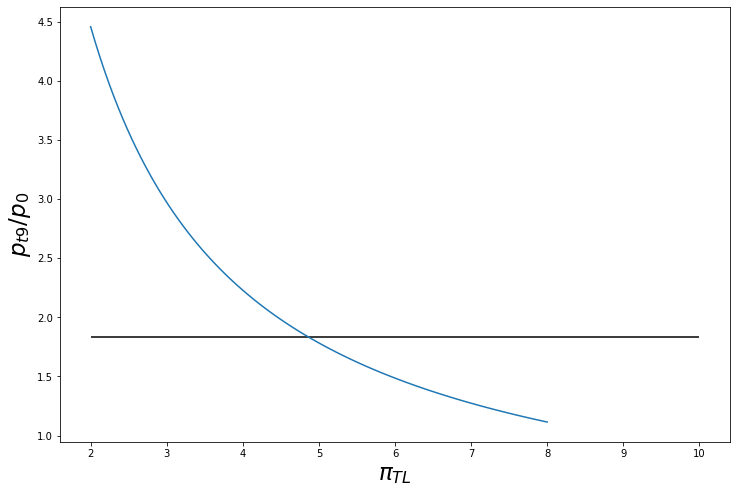

In [27]:
Tp = p_t9/p_0
fig,ax = subplots(figsize=(12,8))
ax.plot(pi_TL,Tp)
ax.hlines(pi_cr,2,10)
ax.set_xlabel("$\pi_{TL}$", size=23)
ax.set_ylabel("$p_{t9}/p_0$", size=23)
show()

实现根据$\frac{p_{t9}}{p_0}$计算$Ma_9$的算法：

In [28]:
Ma_9 = array([])
for i in range(len(pi_TL)):
    if Tp[i]<pi_cr:
        m=((2/(k_g-1)*((p_t9[i]/p_0)**((k_g-1)/k_g)-1)))**0.5
        Ma_9=append(Ma_9,m)
    else:
        m=1;
        Ma_9 = append(Ma_9,1)

尾喷管出口其他参数：
$$\frac{T_{\mathrm{t9}}}{T_{9}}=\left(1+\frac{k_{\mathrm{g}}-1}{2} M a_{9}^{2}\right)$$

$$T_{9}=\frac{T_{9}}{T_{\mathrm{t9}}} T_{\mathrm{t9}} \mathrm{K}$$

$$a_{9}=\sqrt{k_{\mathrm{g}}RT_{9}}$$

$$c_{9}= a_{9} M a_{9}$$

In [29]:
T_t9_9 = (1+(k_g-1)/2*Ma_9**2)
T_9 = T_t9/T_t9_9
a_9 = (k_g*R*T_9)**0.5
c_9=a_9*Ma_9

喷气反作用力：
$$
F_{\mathrm{s.j}}=\frac{F_{\mathrm{j}}}{W_{\mathrm{a}}}=\left[\left(1-\beta-\delta_{1}-\delta_{2}\right)(1+f)+\delta_{1}+\delta_{2}\right] c_{9}-c_{0}
$$

In [30]:
F_sj=((1-beta_-delta_1-delta_2)*(1+f_)+delta_1+delta_2)*c_9-c_0

螺旋桨计算。螺旋桨从低压涡轮轴上获得的单位发动机空气质量流量功率为：
$$
\frac{N_{\mathrm{B}}}{W_{\mathrm{a}}}=\eta_{\mathrm{g}}\left[\left(1-\beta-\delta_{1}-\delta_{2}\right)(1+f)+\delta_{1}+\delta_{2}\right] C_{p \mathrm{g}}\left(T_{\mathrm{t}, \mathrm{4c}}-T_{\mathrm{t5}}\right)
$$

In [31]:
P=eta_g*((1-beta_-delta_1-delta_2)*(1+f_)+delta_1+delta_2)*C_pg*(T_t4c-T_t5)

螺旋桨产生的单位拉力为：
$$
F_{\mathrm{s}, \mathrm{B}}=\frac{F_{\mathrm{B}}}{W_{\mathrm{a}}}=\frac{N_{\mathrm{B}} \eta_{\mathrm{B}}}{W_{\mathrm{a}} c_{0}}
$$

In [32]:
F_sB=P*eta_B/c_0

整台发动机性能参数：

单位推力：
$$
F_s=F_{s,j}+F_{s,B}
$$

In [33]:
F_s=1*(F_sj+F_sB)

推力油耗率：
$$
\mathrm{sfc}=\frac{3600 \mathrm{W}_{f}}{F}=\frac{3600 f\left(1-\beta-\delta_{1}-\delta_{2}\right)}{F_{s}} 
$$

In [34]:
sfc=3600*f_*(1-beta_-delta_1-delta_2)/F_s

当量功率油耗率：
$$
(\mathrm{sfc})_{\mathrm{e}}=\frac{3600 \mathrm{W}_f}{N_{\mathrm{e}}}=\frac{3600 f\left(1-\beta-\delta_{1}-\delta_{2}\right)}{\frac{N_{\mathrm{B}}}{W_{\mathrm{a}}}+\frac{F_{\mathrm{s}} c_{0}}{\eta_{B}}} 
$$

In [35]:
sfc_e=3600*f_*(1-beta_-delta_1-delta_2)/(P+c_0*F_s/eta_B)*1000

绘制低压涡轮落压比对涡轮螺旋桨发动机单位推力和油耗率影响图。

7.2727272727272725


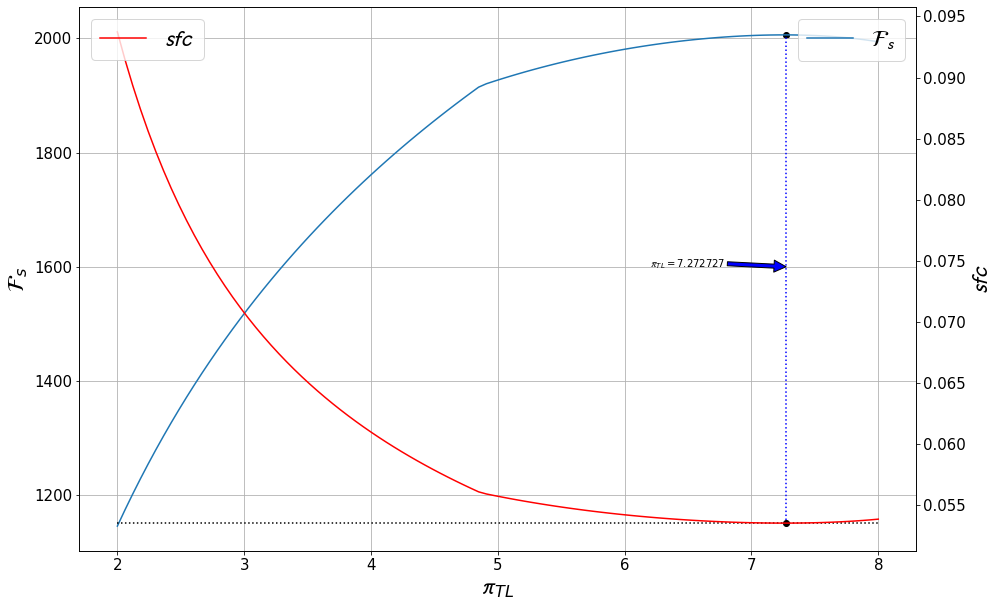

In [36]:
fig = figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.plot(pi_TL,F_s, '-', label = '$\mathcal{F}_\mathcal{s}$')
ax2 = ax.twinx()
ax2.plot(pi_TL,sfc, '-r', label = '$\mathcal{sfc}$')


font1 = {'size':23}
ax.legend(loc=1, prop=font1)
ax.grid()
ax2.legend(loc=2, prop=font1)
ax.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)


ax.set_ylabel('$\mathcal{F}_s$', size=23)
ax2.set_ylabel('$\mathcal{sfc}$', size=23)
ax.set_xlabel('$\mathcal{\pi}_{TL}$', size=23)

pi_TL_opt=pi_TL[np.argmin(sfc)]
print(pi_TL_opt)
ax2.hlines(min(sfc), 2, 8, 'black', linestyle=':')
ax.vlines(pi_TL_opt, 1150, max(F_s), 'blue', linestyle = ':')
ax.annotate('$\mathcal{\pi}_{TL}=$%f'%pi_TL_opt, xy=(pi_TL_opt, 1600), xycoords='data',
             xytext=(6.2,1600),arrowprops=dict(facecolor='blue', shrink=2))
ax.scatter(pi_TL_opt, max(F_s), c = 'black')
ax2.scatter(pi_TL_opt, min(sfc), c = 'black')
savefig('1.svg')
show()

In [37]:
pi_TL_opt=pi_TL[np.argmax(F_s)]
pi_TL_opt

7.2727272727272725

绘制$\Delta$和$\pi_C$对$L_e$和$(sfc)_e$的影响

In [38]:
Ma_0 = 0.72
H = 10000
T_t4 = 1600
T_0 = 223.15
p_0 = 26436.56
pi_C = linspace(16,100,1000)

sigma_i = 0.97
eta_c = 0.8422
eta_TH = 0.9064
eta_TL = 0.9282
sigma_b = 0.97
eta_b = 0.98
eta_mH = 0.98
eta_mL = 0.98
eta_B = 0.82
eta_g = 0.99
delta_1 = 0.05
C_T0 = 0
beta_ = 0
C_p = 1004.6
k = 1.4
k_g = 1.3
R = 287
C_pg = 1234.8
H_u = 42900000#焦耳
sigma_e = 0.98
delta_2=0.02
pi_TL=pi_TL_opt

a_0 = (k*R*T_0)**0.5
c_0=Ma_0*a_0
p_t0 = p_0*(1+(k-1)/2*Ma_0**2)**(k/(k-1))
T_t0 = T_0*(1+(k-1)/2*Ma_0**2)
p_t2 = sigma_i*p_t0
T_t2 = T_t0
p_t3 = p_t2*pi_C
T_t3 = T_t2*(1+(pi_C**((k-1)/k)-1)/eta_c)
f_ = (C_pg*T_t4-C_p*T_t3)/(eta_b*H_u-C_pg*T_t4)
p_t4 = p_t3*sigma_b
tao_m1 = ((1-beta_-delta_1-delta_2)*(1+f_) + C_p*delta_1*T_t3/(C_pg*T_t4))/((1-beta_-delta_1-delta_2)*(1+f_)+delta_1)
T_t4a = T_t4*tao_m1
p_t4a = p_t4
a = 1 - C_p*(T_t3-T_t2)/(((1-beta_-delta_1-delta_2)*(1+f_)+delta_1)*eta_mH*C_pg*T_t4a)
T_t45 = a*T_t4a
pi_TH = (1-(1-T_t45/T_t4a)/eta_TH)**(-k_g/(k_g-1))
p_t45 = p_t4a/pi_TH
tao_m2 = ((1-beta_-delta_1-delta_2)*(1+f_)+delta_1+delta_2*C_p*T_t3/(C_pg*T_t45))/((1-beta_-delta_1-delta_2)*(1+f_)+delta_1+delta_2)
T_t4c = tao_m2*T_t45
eta_TL = 0.9282
p_t5 = p_t45/pi_TL
T_t5_5 = 1-(1-1/(pi_TL**((k_g-1)/k_g)))*eta_TL
T_t5 = T_t5_5*T_t4c
T_t9 = T_t5
p_t9=0.98*p_t5
Ma_9=((2/(k_g-1)*((p_t9/p_0)**((k_g-1)/k_g)-1)))**0.5
T_t9_9 = (1+(k_g-1)/2*Ma_9**2)
T_9 = T_t9/T_t9_9
a_9 = (k_g*R*T_9)**0.5
c_9=a_9*Ma_9
F_sj=((1-beta_-delta_1-delta_2)*(1+f_)+delta_1+delta_2)*c_9-c_0
P=eta_g*((1-beta_-delta_1-delta_2)*(1+f_)+delta_1+delta_2)*C_pg*(T_t4c-T_t5)
F_sB=P*eta_B/c_0
F_s=1*(F_sj+F_sB)
sfc=3600*f_*(1-beta_-delta_1-delta_2)/F_s
sfc_e=3600*f_*(1-beta_-delta_1-delta_2)/(P+c_0*F_s/eta_B)*1000

In [39]:
pi_C = linspace(1,400,1000)
e_ = pi_C**((k-1)/k)
L_e = C_p*T_0*(T_t4/T_0-e_)*(1-1/e_)

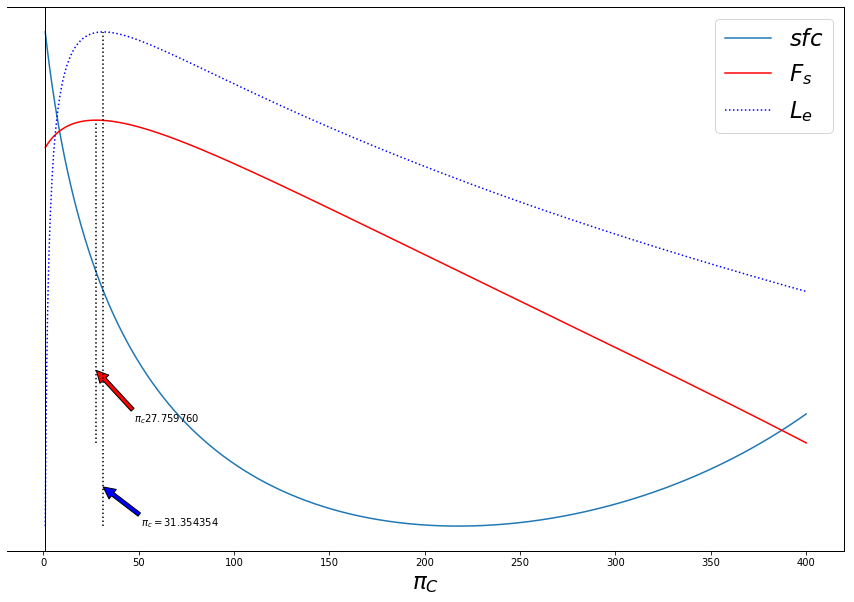

In [40]:
fig = figure(figsize = (15,10))
ax = fig.add_subplot(111)
lns1 = ax.plot(pi_C,sfc, '-', label = '$sfc$')
ax2 = ax.twinx()
lns2 = ax2.plot(pi_C,F_s, '-r', label = '$F_s$')
ax2.set_ylim(1300,2200)
ax.set_xlabel('$\pi_{C}$', size=23)
ax3 = ax.twinx()
lns3 = ax3.plot(pi_C, L_e, ':b',label = '$L_e$')
ax2.vlines(pi_C[np.argmax(F_s, axis=0)],min(F_s),max(F_s),linestyle=':')

ax2.annotate('$\pi_c$%f'%pi_C[np.argmax(F_s, axis=0)], xy=(pi_C[np.argmax(F_s, axis=0)], min(F_s)+120), xycoords='data',
             xytext=(pi_C[np.argmax(F_s, axis=0)]+20,min(F_s)+35),arrowprops=dict(facecolor='red', shrink=1))
ax3.annotate('$\pi_c=$%f'%pi_C[np.argmax(L_e, axis=0)], xy=(pi_C[np.argmax(L_e, axis=0)], min(L_e)+50000), xycoords='data',
             xytext=(pi_C[np.argmax(L_e, axis=0)]+20,min(L_e)),arrowprops=dict(facecolor='blue', shrink=1))

ax3.vlines(pi_C[np.argmax(L_e, axis=0)],min(L_e),max(L_e),linestyle=':')
ax.spines['left'].set_position(('data', 1))
ax2.spines['left'].set_position(('data', 1))
ax3.spines['left'].set_position(('data', 1))

ax.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
font1 = {'size':23}
ax.legend(lns, labs, loc=0, prop=font1)
savefig('2.svg')
show()

In [41]:
pi_C = 25
delta_ = linspace(6.5,9.5,100)

In [42]:
Ma_0 = 0.72
H = 10000
T_0 = 223.15
p_0 = 26436.56
T_t4 = T_0*delta_

sigma_i = 0.97
eta_c = 0.8422
eta_TH = 0.9064
eta_TL = 0.9282
sigma_b = 0.97
eta_b = 0.98
eta_mH = 0.98
eta_mL = 0.98
eta_B = 0.82
eta_g = 0.99
delta_1 = 0.05
C_T0 = 0
beta_ = 0
C_p = 1004.6
k = 1.4
k_g = 1.3
R = 287
C_pg = 1234.8
H_u = 42900000#焦耳
sigma_e = 0.98
delta_2=0.02
pi_TL=pi_TL_opt

a_0 = (k*R*T_0)**0.5
c_0=Ma_0*a_0
p_t0 = p_0*(1+(k-1)/2*Ma_0**2)**(k/(k-1))
T_t0 = T_0*(1+(k-1)/2*Ma_0**2)
p_t2 = sigma_i*p_t0
T_t2 = T_t0
p_t3 = p_t2*pi_C
T_t3 = T_t2*(1+(pi_C**((k-1)/k)-1)/eta_c)
f_ = (C_pg*T_t4-C_p*T_t3)/(eta_b*H_u-C_pg*T_t4)
p_t4 = p_t3*sigma_b
tao_m1 = ((1-beta_-delta_1-delta_2)*(1+f_) + C_p*delta_1*T_t3/(C_pg*T_t4))/((1-beta_-delta_1-delta_2)*(1+f_)+delta_1)
T_t4a = T_t4*tao_m1
p_t4a = p_t4
a = 1 - C_p*(T_t3-T_t2)/(((1-beta_-delta_1-delta_2)*(1+f_)+delta_1)*eta_mH*C_pg*T_t4a)
T_t45 = a*T_t4a
pi_TH = (1-(1-T_t45/T_t4a)/eta_TH)**(-k_g/(k_g-1))
p_t45 = p_t4a/pi_TH
tao_m2 = ((1-beta_-delta_1-delta_2)*(1+f_)+delta_1+delta_2*C_p*T_t3/(C_pg*T_t45))/((1-beta_-delta_1-delta_2)*(1+f_)+delta_1+delta_2)
T_t4c = tao_m2*T_t45
eta_TL = 0.9282
p_t5 = p_t45/pi_TL
T_t5_5 = 1-(1-1/(pi_TL**((k_g-1)/k_g)))*eta_TL
T_t5 = T_t5_5*T_t4c
T_t9 = T_t5
p_t9=0.98*p_t5
Ma_9=((2/(k_g-1)*((p_t9/p_0)**((k_g-1)/k_g)-1)))**0.5
T_t9_9 = (1+(k_g-1)/2*Ma_9**2)
T_9 = T_t9/T_t9_9
a_9 = (k_g*R*T_9)**0.5
c_9=a_9*Ma_9
F_sj=((1-beta_-delta_1-delta_2)*(1+f_)+delta_1+delta_2)*c_9-c_0
P=eta_g*((1-beta_-delta_1-delta_2)*(1+f_)+delta_1+delta_2)*C_pg*(T_t4c-T_t5)
F_sB=P*eta_B/c_0
F_s=1*(F_sj+F_sB)
sfc=3600*f_*(1-beta_-delta_1-delta_2)/F_s
sfc_e=3600*f_*(1-beta_-delta_1-delta_2)/(P+c_0*F_s/eta_B)*1000

In [43]:
e_ = pi_C**((k-1)/k)
L_e = C_p*T_0*(T_t4/T_0-e_)*(1-1/e_)

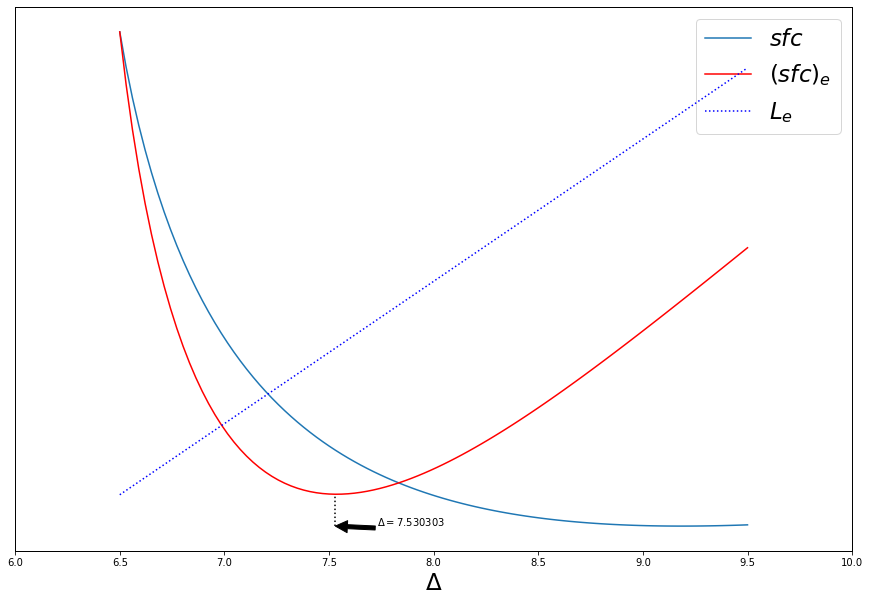

In [44]:
fig = figure(figsize = (15,10))
ax = fig.add_subplot(111)
lns1 = ax.plot(delta_,sfc, '-', label = '$sfc$')
ax2 = ax.twinx()
lns2 = ax2.plot(delta_,sfc_e, '-r', label = '$(sfc)_e$')
ax.set_xlabel('$\Delta$', size=23)
ax3 = ax.twinx()
lns3 = ax3.plot(delta_, L_e, ':b',label = '$L_e$')
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
font1 = {'size':23}
ax.legend(lns, labs, loc=0, prop=font1)
ax.set_xlim(6,10)
ax3.set_ylim(485000,1000000)
ax2.vlines(delta_[np.argmin(sfc_e, axis=0)],0.1038,min(sfc_e),linestyle=':')
ax2.annotate('$\Delta=$%f'%delta_[np.argmin(sfc_e, axis=0)], xy=(delta_[np.argmin(sfc_e, axis=0)], 0.1038), xycoords='data',
             xytext=(delta_[np.argmin(sfc_e, axis=0)]+0.2,0.1038),arrowprops=dict(facecolor='black',))
ax.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])
savefig('3.svg')
show()